In [1]:
import numpy as np
import pandas as pd
import math           
import operator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#KNN
def knnClassifier(trainData, testData, labels, k):

    rowSize = trainData.shape[0]

    diff = np.tile(testData, (rowSize, 1)) - trainData

    sqrDiff = diff ** 2
    sqrDiffSum = sqrDiff.sum(axis=1)

    distances = sqrDiffSum ** 0.5

    sortDistance = distances.argsort()
    
    count = {}
    
    for i in range(1):
        vote = labels[sortDistance[i]]
        count[vote] = count.get(vote, 0) + 1

    sortCount = sorted(count.items(), key=operator.itemgetter(1), reverse=True)
    

    return sortCount[0][0] 

In [3]:
iris.target_names

NameError: name 'iris' is not defined

Predictive value：
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Actual value：
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Accuracy rate of KNN： 0.9777777777777777


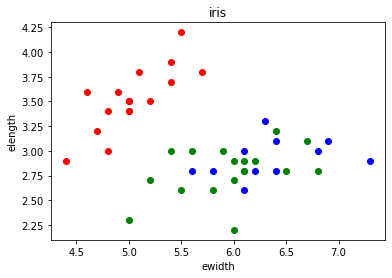

In [4]:

from sklearn import datasets 
from sklearn.metrics import accuracy_score
import pylab as plt

iris=datasets.load_iris()
data=iris.data
target=iris.target


data_train,data_test,target_train,target_test=train_test_split(data,target,test_size=0.3,random_state=0)

knn=KNeighborsClassifier()
knn.fit(data_train,target_train)
accurate_Knn=knn.score(data_test,target_test,sample_weight=None)
print('Predictive value：\n',(knn.predict(data_test)))
print('Actual value：\n',(target_test))
print('Accuracy rate of KNN：',accurate_Knn)


for i in range(len(target_test)):
    if target_test[i]==0:
        plt.scatter(data_test[i,0],data_test[i,1],c='r', label='setosa')
    elif target_test[i]==1:
        plt.scatter(data_test[i,0],data_test[i,1],c='g', label='versicolor')
    else:
        plt.scatter(data_test[i,0],data_test[i,1],c='b', label='virginica')
        
plt.title("iris")
plt.xlabel("ewidth")
plt.ylabel("elength")
plt.show()

Predictive value：
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Actual value：
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Accuracy rate of SVM： 0.9619047619047619


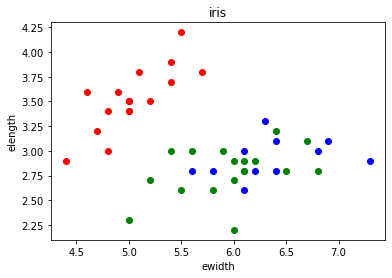

In [5]:
#SVM
from sklearn.svm import SVC
svm=SVC(kernel='rbf',gamma=0.1,decision_function_shape='ovo',C=0.8)
svm.fit(data_train,target_train)
accurate_Svm=svm.score(data_train,target_train)
print('Predictive value：\n',(svm.predict(data_test)))
print('Actual value：\n',(target_test))
print('Accuracy rate of SVM：',accurate_Svm)
for i in range(len(target_test)):
    if target_test[i]==0:
        plt.scatter(data_test[i,0],data_test[i,1],c='r')
    elif target_test[i]==1:
        plt.scatter(data_test[i,0],data_test[i,1],c='g')
    else:
        plt.scatter(data_test[i,0],data_test[i,1],c='b')
plt.title("iris")
plt.xlabel("ewidth")
plt.ylabel("elength")
plt.show()

Predictive value： [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Actual value： [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Accuracy rate of naive bayes： 0.9428571428571428


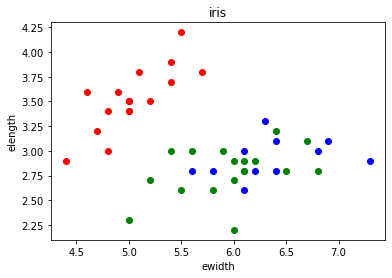

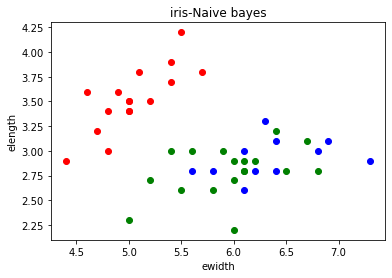

In [6]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(data_train,target_train)
accurate_Nb=nb.score(data_train,target_train)
print('Predictive value：',(nb.predict(data_test)))
print('Actual value：',(target_test))
print('Accuracy rate of naive bayes：',accurate_Nb)
for i in range(len(target_test)):
    if target_test[i]==0:
        plt.scatter(data_test[i,0],data_test[i,1],c='r')
    elif target_test[i]==1:
        plt.scatter(data_test[i,0],data_test[i,1],c='g')
    else:
        plt.scatter(data_test[i,0],data_test[i,1],c='b')
plt.title("iris")
plt.xlabel("ewidth")
plt.ylabel("elength")
plt.show()

pr=nb.predict(data_test)
for i in range(len(pr)):
    if pr[i]==0:
        plt.scatter(data_test[i,0],data_test[i,1],c='r')
    elif pr[i]==1:
        plt.scatter(data_test[i,0],data_test[i,1],c='g')
    else:
        plt.scatter(data_test[i,0],data_test[i,1],c='b')

plt.title("iris-Naive bayes")
plt.xlabel("ewidth")
plt.ylabel("elength")
plt.show()

In [7]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import display, Image

iris=datasets.load_iris()

x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3, random_state=6)

clf = DecisionTreeClassifier(criterion='entropy') 
clf.fit(x_train, y_train)
y_test_pre = clf.predict(x_test) 
#print(y_test_pre)


In [8]:
num = data.shape[0]
num_train = x_train.shape[0] 
num_test = num - num_train 
acc = sum(y_test_pre == y_test) / num_test
print('The accuracy is ', acc)

The accuracy is  0.9333333333333333


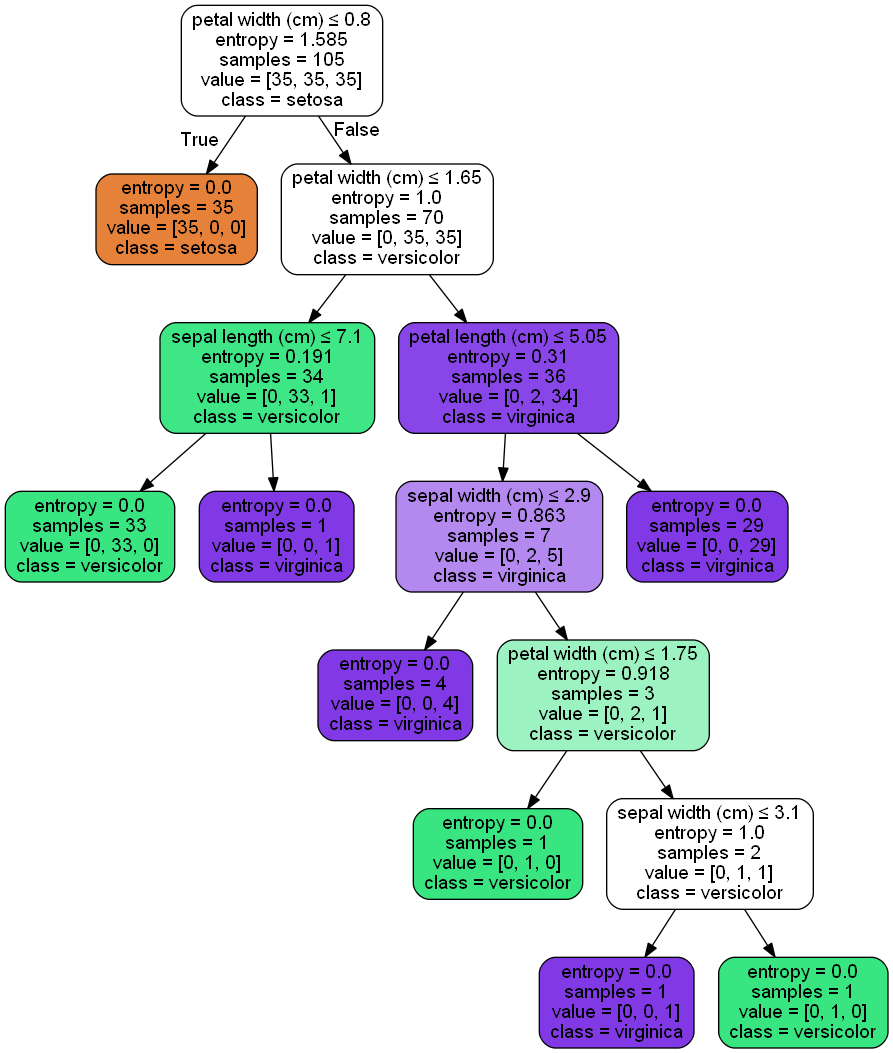

In [9]:
import pydot
dot_data = export_graphviz(clf,out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('Decision_tree_iris_tp1.pdf')
Image(graph.create_png())